<a href="https://colab.research.google.com/github/Darshan0805/Deep-Learning/blob/main/2348548_DL4_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape

(7043, 21)

In [ ]:
# Drop columns not needed for prediction
data.drop(columns=['customerID'], inplace=True)

In [ ]:
# Convert categorical variables to one-hot encoding
data = pd.get_dummies(data, drop_first=True)

In [ ]:
# Split data into features and target
X = data.drop(columns=['Churn_Yes'])
y = data['Churn_Yes']

In [ ]:
# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_baseline = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=50, batch_size=32)

# Evaluate the model
y_pred_baseline_prob = model.predict(X_test_scaled)
y_pred_baseline = (y_pred_baseline_prob > 0.5).astype(int)
acc_baseline = accuracy_score(y_test, y_pred_baseline)
f1_baseline = f1_score(y_test, y_pred_baseline)
roc_auc_baseline = roc_auc_score(y_test, y_pred_baseline)


Epoch 1/50
141/141 [==============================] - 3s 9ms/step - loss: 0.5152 - accuracy: 0.7386 - val_loss: 0.4776 - val_accuracy: 0.7773
Epoch 2/50
141/141 [==============================] - 1s 7ms/step - loss: 0.1040 - accuracy: 0.9685 - val_loss: 0.5592 - val_accuracy: 0.7737
Epoch 3/50
141/141 [==============================] - 1s 9ms/step - loss: 0.0364 - accuracy: 0.9831 - val_loss: 0.5779 - val_accuracy: 0.7303
Epoch 4/50
141/141 [==============================] - 1s 4ms/step - loss: 0.0297 - accuracy: 0.9840 - val_loss: 0.6070 - val_accuracy: 0.7365
Epoch 5/50
141/141 [==============================] - 1s 5ms/step - loss: 0.0249 - accuracy: 0.9860 - val_loss: 0.6080 - val_accuracy: 0.7462
Epoch 6/50
141/141 [==============================] - 1s 5ms/step - loss: 0.0218 - accuracy: 0.9867 - val_loss: 0.6104 - val_accuracy: 0.7657
Epoch 7/50
141/141 [==============================] - 1s 4ms/step - loss: 0.0204 - accuracy: 0.9880 - val_loss: 0.6221 - val_accuracy: 0.7737
Epoch 

In [ ]:
# Print evaluation metrics
print("Baseline Model Evaluation:")
print(f"Accuracy: {acc_baseline}")
print(f"F1 Score: {f1_baseline}")
print(f"ROC AUC Score: {roc_auc_baseline}")

Baseline Model Evaluation:
Accuracy: 0.772888573456352
F1 Score: 0.5441595441595442
ROC AUC Score: 0.6894298549794529


In [ ]:
model_dropout = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_dropout = model_dropout.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=50, batch_size=32)


Epoch 1/50
141/141 [==============================] - 2s 6ms/step - loss: 0.6513 - accuracy: 0.6849 - val_loss: 0.6169 - val_accuracy: 0.7374
Epoch 2/50
141/141 [==============================] - 1s 5ms/step - loss: 0.4489 - accuracy: 0.7806 - val_loss: 0.5594 - val_accuracy: 0.7578
Epoch 3/50
141/141 [==============================] - 1s 4ms/step - loss: 0.2855 - accuracy: 0.8726 - val_loss: 0.5537 - val_accuracy: 0.7338
Epoch 4/50
141/141 [==============================] - 1s 4ms/step - loss: 0.1522 - accuracy: 0.9381 - val_loss: 0.5914 - val_accuracy: 0.6974
Epoch 5/50
141/141 [==============================] - 1s 5ms/step - loss: 0.0855 - accuracy: 0.9676 - val_loss: 0.6100 - val_accuracy: 0.7090
Epoch 6/50
141/141 [==============================] - 1s 4ms/step - loss: 0.0548 - accuracy: 0.9785 - val_loss: 0.6110 - val_accuracy: 0.7693
Epoch 7/50
141/141 [==============================] - 1s 5ms/step - loss: 0.0417 - accuracy: 0.9814 - val_loss: 0.6256 - val_accuracy: 0.7702
Epoch 

In [ ]:
# Evaluate the model
y_pred_dropout_prob = model_dropout.predict(X_test_scaled)
y_pred_dropout = (y_pred_dropout_prob > 0.5).astype(int)
acc_dropout = accuracy_score(y_test, y_pred_dropout)
f1_dropout = f1_score(y_test, y_pred_dropout)
roc_auc_dropout = roc_auc_score(y_test, y_pred_dropout)

print("\nDropout Model Evaluation:")
print(f"Accuracy: {acc_dropout}")
print(f"F1 Score: {f1_dropout}")
print(f"ROC AUC Score: {roc_auc_dropout}")

45/45 [==============================] - 0s 3ms/step

Dropout Model Evaluation:
Accuracy: 0.7054648687012065
F1 Score: 0.5903257650542941
ROC AUC Score: 0.7362289999689464


In [ ]:
model_layerwise_dropout = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

model_layerwise_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_layerwise_dropout = model_layerwise_dropout.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=50, batch_size=32)

# Evaluate the model
y_pred_layerwise_dropout_prob = model_layerwise_dropout.predict(X_test_scaled)
y_pred_layerwise_dropout = (y_pred_layerwise_dropout_prob > 0.5).astype(int)
acc_layerwise_dropout = accuracy_score(y_test, y_pred_layerwise_dropout)
f1_layerwise_dropout = f1_score(y_test, y_pred_layerwise_dropout)
roc_auc_layerwise_dropout = roc_auc_score(y_test, y_pred_layerwise_dropout)

Epoch 1/50
141/141 [==============================] - 6s 19ms/step - loss: 0.5494 - accuracy: 0.7260 - val_loss: 0.5092 - val_accuracy: 0.7906
Epoch 2/50
141/141 [==============================] - 1s 8ms/step - loss: 0.2419 - accuracy: 0.9006 - val_loss: 0.5211 - val_accuracy: 0.7799
Epoch 3/50
141/141 [==============================] - 1s 4ms/step - loss: 0.0615 - accuracy: 0.9805 - val_loss: 0.5579 - val_accuracy: 0.7862
Epoch 4/50
141/141 [==============================] - 1s 4ms/step - loss: 0.0375 - accuracy: 0.9822 - val_loss: 0.5930 - val_accuracy: 0.7613
Epoch 5/50
141/141 [==============================] - 1s 5ms/step - loss: 0.0303 - accuracy: 0.9854 - val_loss: 0.5876 - val_accuracy: 0.7746
Epoch 6/50
141/141 [==============================] - 1s 4ms/step - loss: 0.0273 - accuracy: 0.9862 - val_loss: 0.5965 - val_accuracy: 0.7622
Epoch 7/50
141/141 [==============================] - 1s 5ms/step - loss: 0.0287 - accuracy: 0.9860 - val_loss: 0.6048 - val_accuracy: 0.7595
Epoch

In [ ]:
print("\nLayer-wise Dropout Model Evaluation:")
print(f"Accuracy: {acc_layerwise_dropout}")
print(f"F1 Score: {f1_layerwise_dropout}")
print(f"ROC AUC Score: {roc_auc_layerwise_dropout}")


Layer-wise Dropout Model Evaluation:
Accuracy: 0.7821149751596878
F1 Score: 0.556998556998557
ROC AUC Score: 0.6974197004357863


In [ ]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

model_mc_dropout = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    MCDropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    MCDropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

model_mc_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_mc_dropout = model_mc_dropout.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=50, batch_size=32)


Epoch 1/50
141/141 [==============================] - 5s 11ms/step - loss: 0.5599 - accuracy: 0.7229 - val_loss: 0.5731 - val_accuracy: 0.7409
Epoch 2/50
141/141 [==============================] - 1s 9ms/step - loss: 0.2325 - accuracy: 0.9070 - val_loss: 0.5315 - val_accuracy: 0.7453
Epoch 3/50
141/141 [==============================] - 1s 8ms/step - loss: 0.0603 - accuracy: 0.9805 - val_loss: 0.5853 - val_accuracy: 0.7613
Epoch 4/50
141/141 [==============================] - 1s 9ms/step - loss: 0.0359 - accuracy: 0.9865 - val_loss: 0.5906 - val_accuracy: 0.7640
Epoch 5/50
141/141 [==============================] - 1s 7ms/step - loss: 0.0331 - accuracy: 0.9847 - val_loss: 0.5884 - val_accuracy: 0.7684
Epoch 6/50
141/141 [==============================] - 1s 6ms/step - loss: 0.0308 - accuracy: 0.9825 - val_loss: 0.6028 - val_accuracy: 0.7737
Epoch 7/50
141/141 [==============================] - 1s 4ms/step - loss: 0.0269 - accuracy: 0.9860 - val_loss: 0.6168 - val_accuracy: 0.7773
Epoch

In [ ]:
# Evaluate the Monte Carlo dropout model
y_pred_mc_dropout_prob = model_mc_dropout.predict(X_test_scaled)
y_pred_mc_dropout = (y_pred_mc_dropout_prob > 0.5).astype(int)
acc_mc_dropout = accuracy_score(y_test, y_pred_mc_dropout)
f1_mc_dropout = f1_score(y_test, y_pred_mc_dropout)
roc_auc_mc_dropout = roc_auc_score(y_test, y_pred_mc_dropout)

print("\nMonte Carlo Dropout Model Evaluation:")
print(f"Accuracy: {acc_mc_dropout}")
print(f"F1 Score: {f1_mc_dropout}")
print(f"ROC AUC Score: {roc_auc_mc_dropout}")

45/45 [==============================] - 0s 4ms/step

Monte Carlo Dropout Model Evaluation:
Accuracy: 0.7750177430801988
F1 Score: 0.5603328710124826
ROC AUC Score: 0.7003141594294409


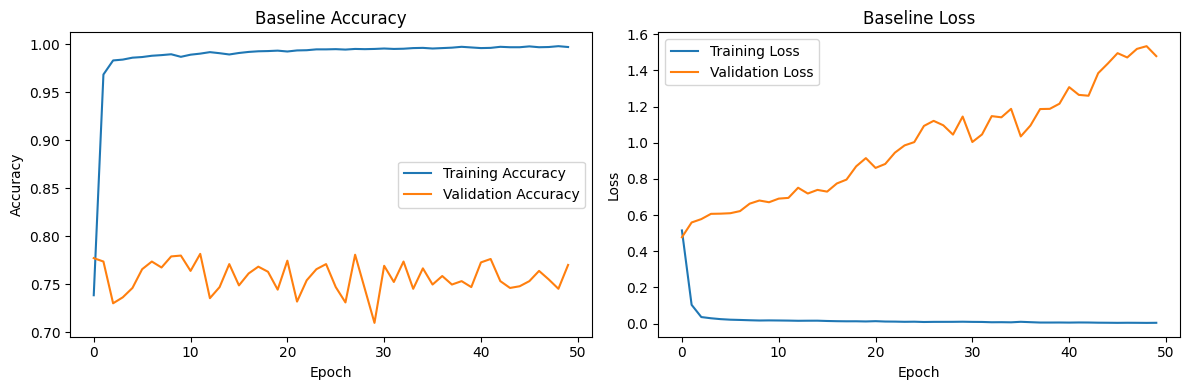

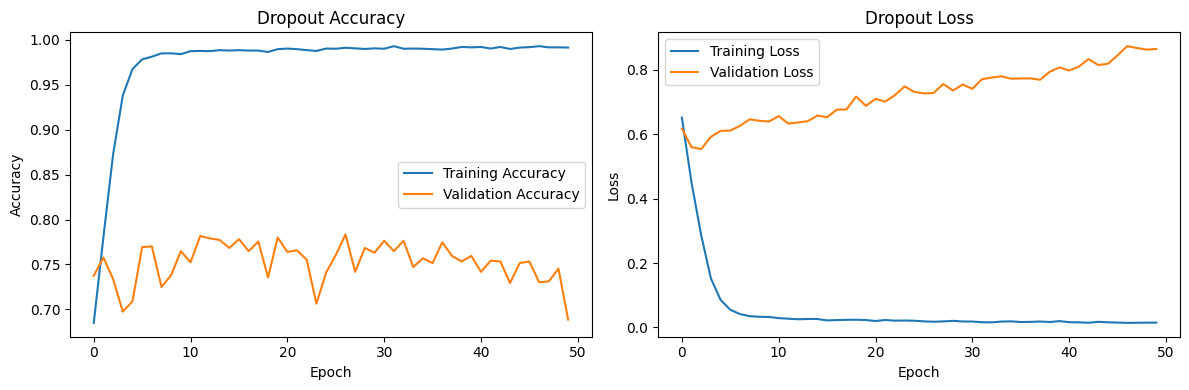

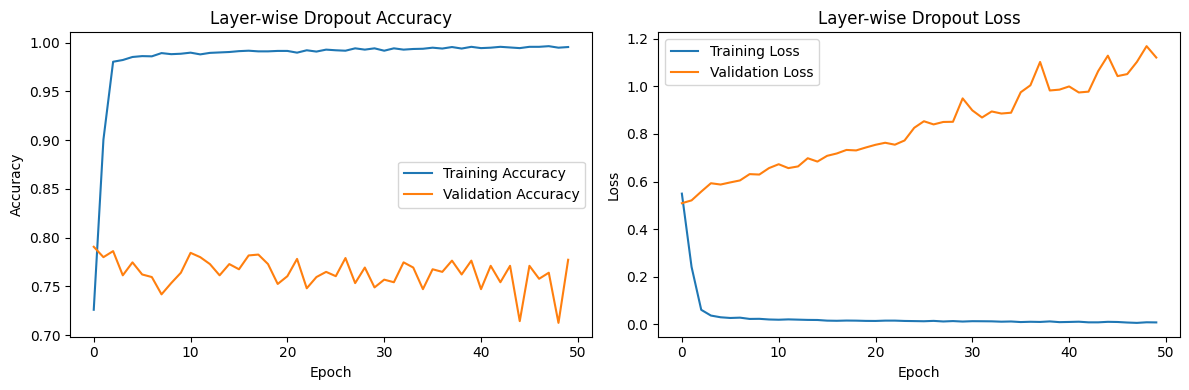

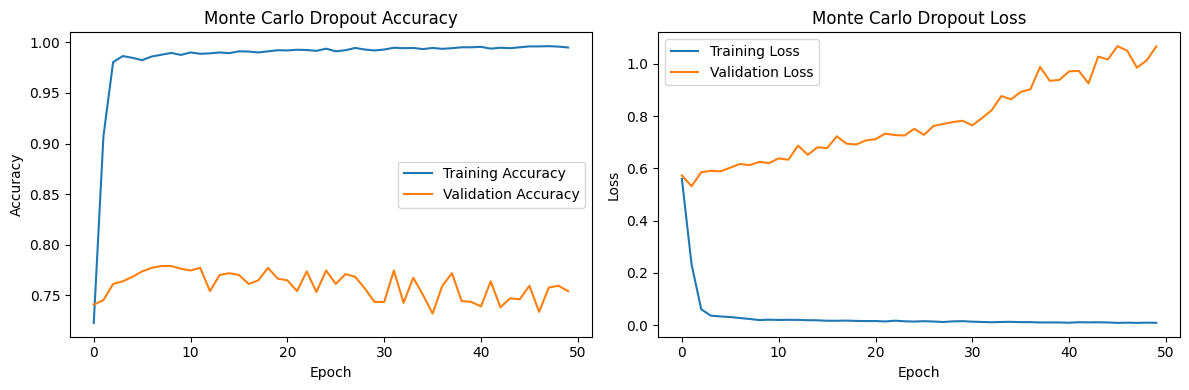

In [ ]:
# Comparison of performance metrics
metrics_df = pd.DataFrame({
    'Model': ['Baseline', 'Dropout', 'Layer-wise Dropout', 'Monte Carlo Dropout'],
    'Accuracy': [acc_baseline, acc_dropout, acc_layerwise_dropout, acc_mc_dropout],
    'F1 Score': [f1_baseline, f1_dropout, f1_layerwise_dropout, f1_mc_dropout],
    'ROC AUC': [roc_auc_baseline, roc_auc_dropout, roc_auc_layerwise_dropout, roc_auc_mc_dropout]
})

# Visualization of training and validation accuracy/loss curves
def plot_curves(history, title):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'{title} Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{title} Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_curves(history_baseline, 'Baseline')
plot_curves(history_dropout, 'Dropout')
plot_curves(history_layerwise_dropout, 'Layer-wise Dropout')
plot_curves(history_mc_dropout, 'Monte Carlo Dropout')


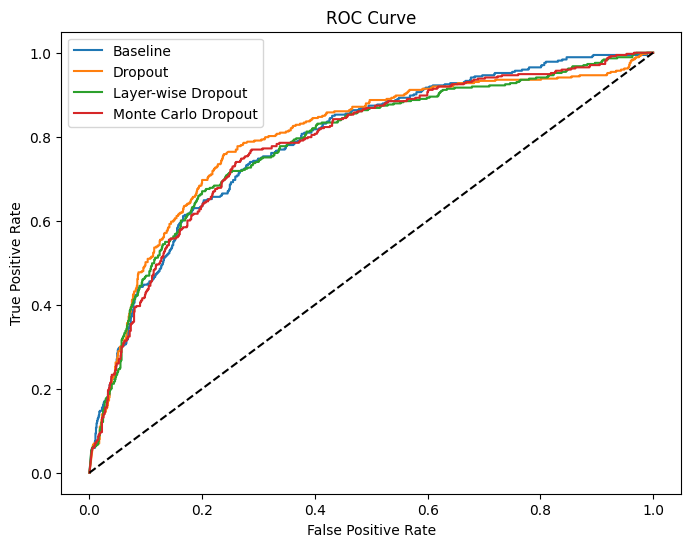

In [ ]:
from sklearn.metrics import roc_curve

# Calculate ROC curve for each model
fpr_baseline, tpr_baseline, _ = roc_curve(y_test, y_pred_baseline_prob)
fpr_dropout, tpr_dropout, _ = roc_curve(y_test, y_pred_dropout_prob)
fpr_layerwise_dropout, tpr_layerwise_dropout, _ = roc_curve(y_test, y_pred_layerwise_dropout_prob)
fpr_mc_dropout, tpr_mc_dropout, _ = roc_curve(y_test, y_pred_mc_dropout_prob)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_baseline, tpr_baseline, label='Baseline')
plt.plot(fpr_dropout, tpr_dropout, label='Dropout')
plt.plot(fpr_layerwise_dropout, tpr_layerwise_dropout, label='Layer-wise Dropout')
plt.plot(fpr_mc_dropout, tpr_mc_dropout, label='Monte Carlo Dropout')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
